In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Deepression.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   Number   Sleep  Appetite  Interest  Fatigue  Worthlessness  Concentration  \
0        1    1.0       1.0       1.0      5.0            5.0            1.0   
1        2    2.0       5.0       5.0      1.0            1.0            5.0   
2        3    5.0       2.0       2.0      2.0            2.0            2.0   
3        4    1.0       1.0       1.0      5.0            5.0            1.0   
4        5    2.0       5.0       5.0      1.0            1.0            5.0   

   Agitation  Suicidal Ideation  Sleep Disturbance  Aggression  Panic Attacks  \
0        5.0                5.0                1.0         5.0            5.0   
1        1.0                1.0                5.0         1.0            1.0   
2        2.0                2.0                2.0         2.0            2.0   
3        5.0                5.0                1.0         5.0            5.0   
4        1.0                1.0                5.0         1.0            1.0   

   Hopelessness  Restlessness  L

In [4]:

# Check for duplicates and remove them
df = df.drop_duplicates()

# Summary after cleaning
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

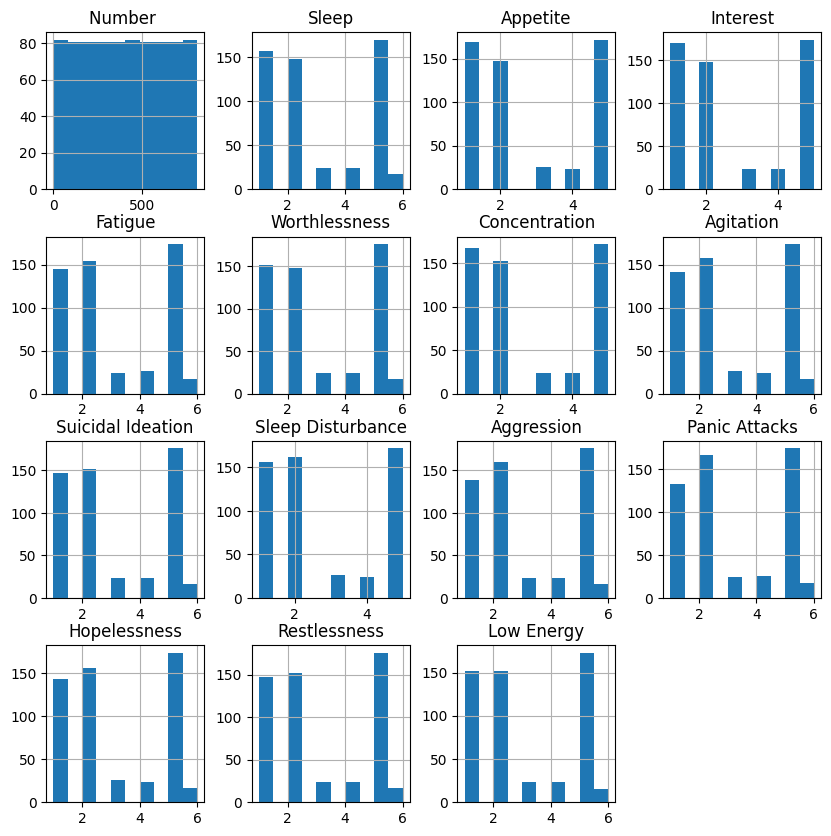

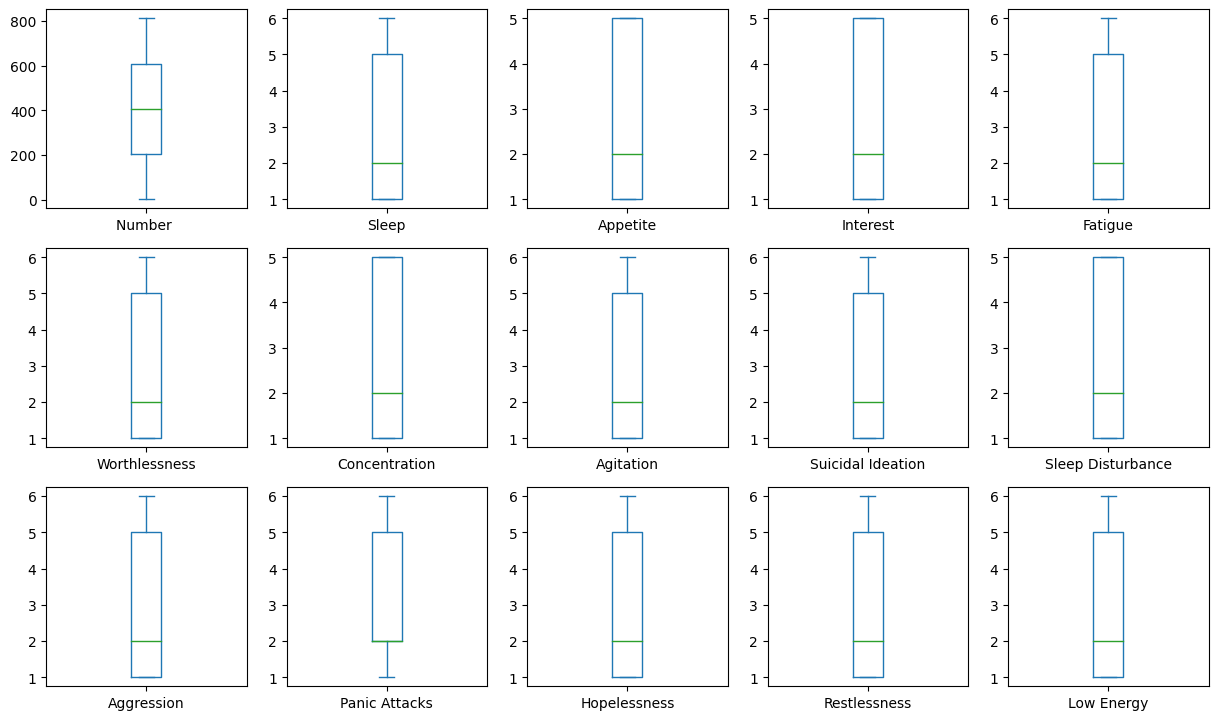

In [5]:
# Histograms for each numeric column
df.hist(figsize=(10, 10))
plt.show()

# Box plots for each numeric column
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,15), sharex=False, sharey=False)
plt.show()


   Number   Sleep  Appetite  Interest  Fatigue  Worthlessness  Concentration  \
0        1    1.0       1.0       1.0      5.0            5.0            1.0   
1        2    2.0       5.0       5.0      1.0            1.0            5.0   
2        3    5.0       2.0       2.0      2.0            2.0            2.0   
3        4    1.0       1.0       1.0      5.0            5.0            1.0   
4        5    2.0       5.0       5.0      1.0            1.0            5.0   

   Agitation  Suicidal Ideation  Sleep Disturbance  Aggression  Panic Attacks  \
0        5.0                5.0                1.0         5.0            5.0   
1        1.0                1.0                5.0         1.0            1.0   
2        2.0                2.0                2.0         2.0            2.0   
3        5.0                5.0                1.0         5.0            5.0   
4        1.0                1.0                5.0         1.0            1.0   

   Hopelessness  Restlessness  L

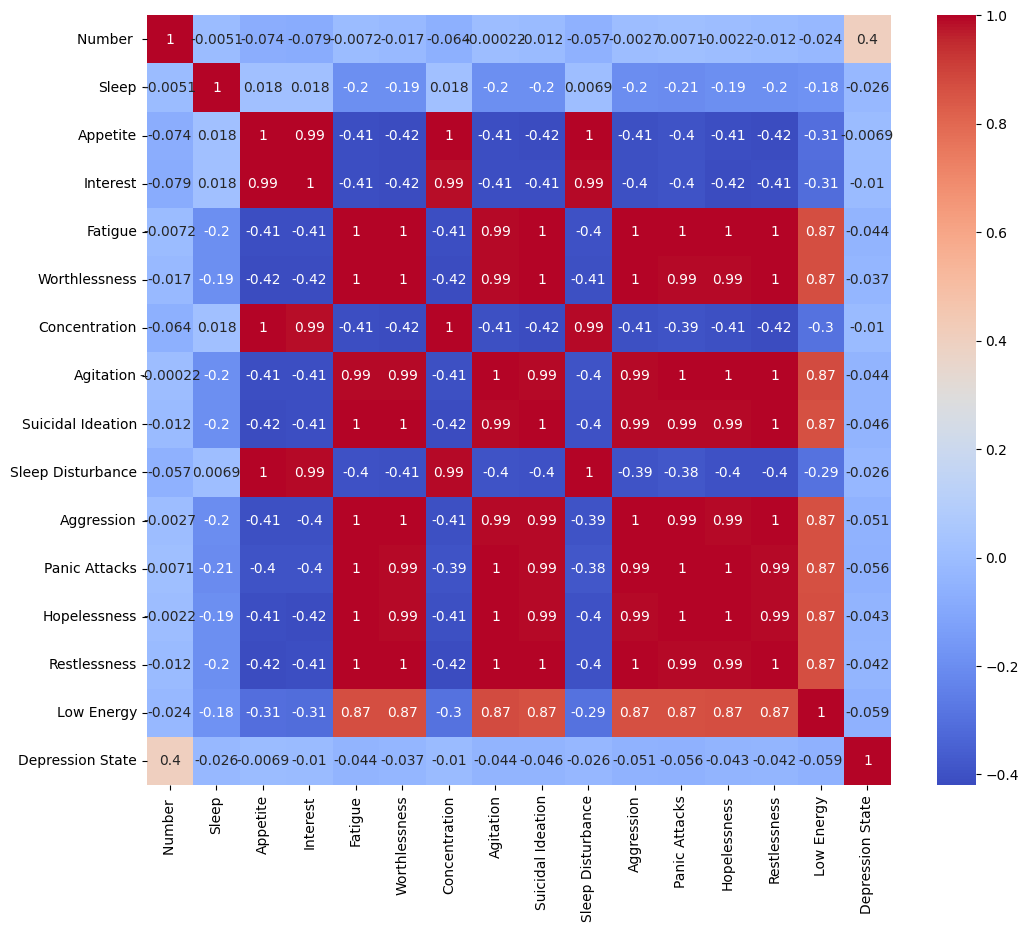

KeyboardInterrupt: 

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset


# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Option 1: Label encode non-numeric columns (if they are categorical)
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Option 2: Drop non-numeric columns if they are not needed for correlation
# df = df.drop(columns=non_numeric_columns)

# Check the updated data types
print(df.dtypes)

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Scatter plots (pairplot)
sns.pairplot(df)
plt.show()


In [8]:
# prompt: show all the columns name

print(df.columns.values)


['Number ' 'Sleep' 'Appetite' 'Interest' 'Fatigue' 'Worthlessness'
 'Concentration' 'Agitation' 'Suicidal Ideation' 'Sleep Disturbance'
 'Aggression' 'Panic Attacks' 'Hopelessness' 'Restlessness' 'Low Energy'
 'Depression State']


Suicidal Ideation    1.000000
Worthlessness        0.997556
Restlessness         0.996297
Fatigue              0.996290
Aggression           0.993847
Hopelessness         0.993809
Agitation            0.991947
Panic Attacks        0.991424
Low Energy           0.866464
Number              -0.011847
Depression State    -0.045796
Sleep               -0.196141
Sleep Disturbance   -0.401866
Interest            -0.412540
Appetite            -0.415234
Concentration       -0.415784
Name: Suicidal Ideation, dtype: float64


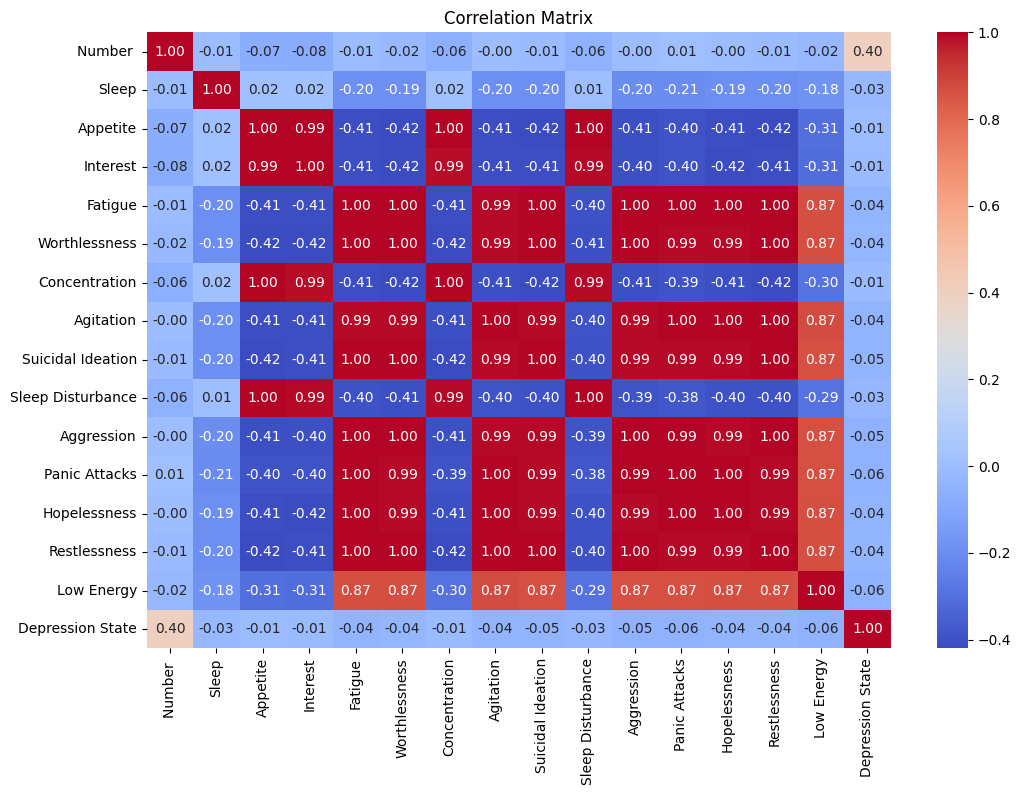

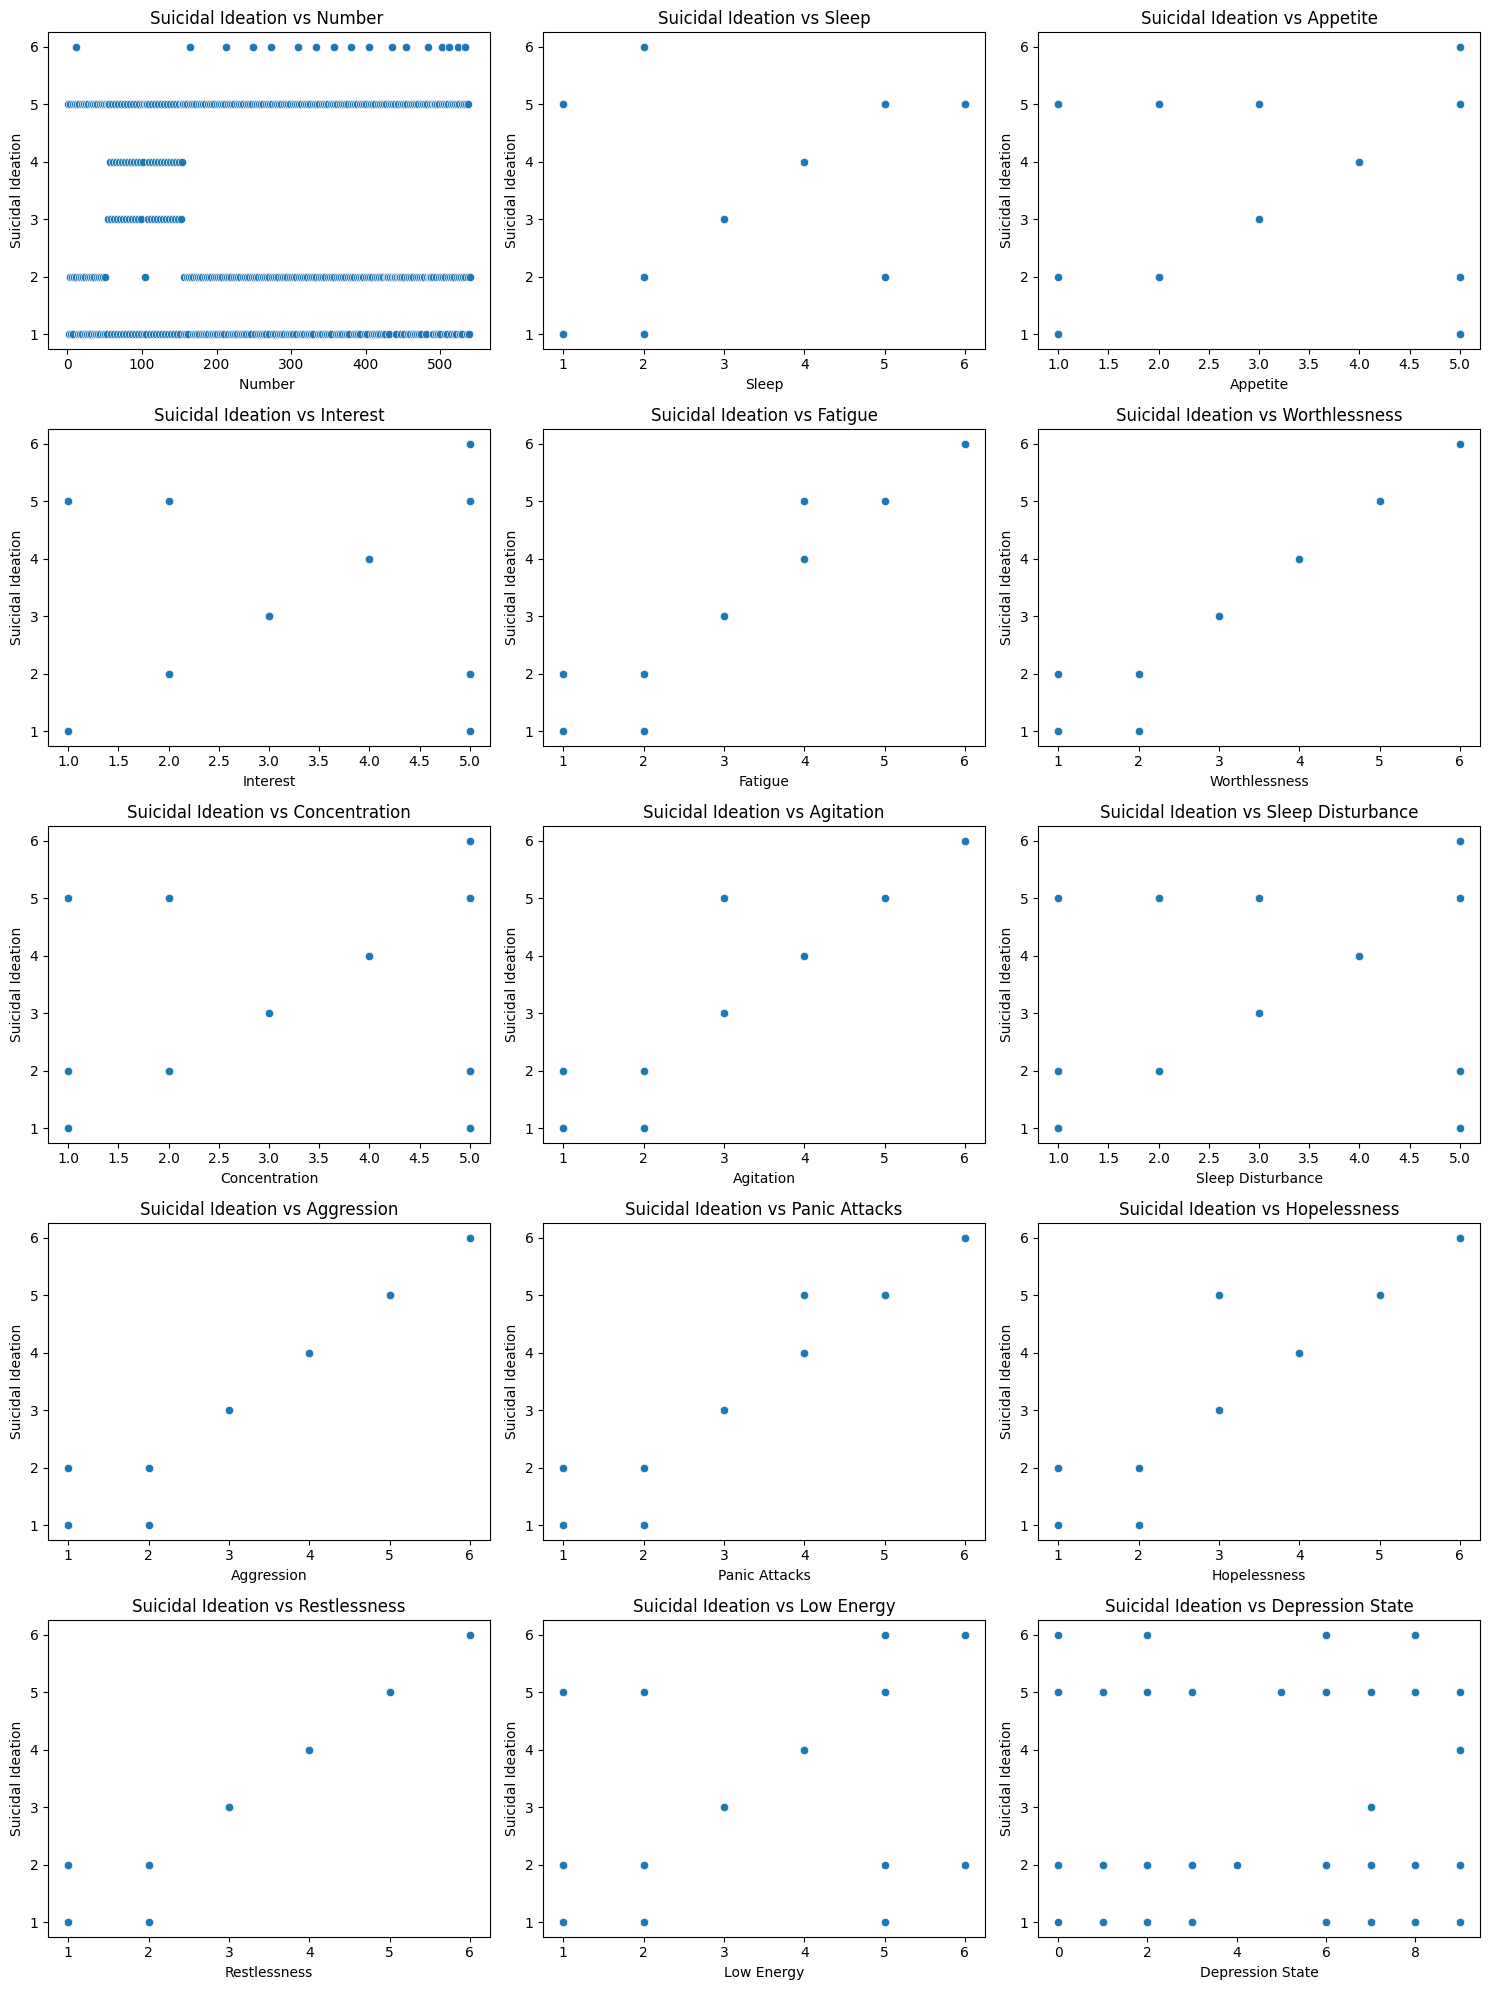

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the correlation of each feature with 'Suicidal Ideation'
suicidal_ideation_corr = correlation_matrix['Suicidal Ideation'].sort_values(ascending=False)

# Display the correlation values
print(suicidal_ideation_corr)

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plot scatter plots for each feature against 'Suicidal Ideation'
features = df.columns.drop('Suicidal Ideation')

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['Suicidal Ideation'])
    plt.title(f'Suicidal Ideation vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Suicidal Ideation')

plt.tight_layout()
plt.show()


In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Handle missing values (example: filling with the mode for categorical columns)
for column in non_numeric_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Create bar charts for each categorical column
for column in non_numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


   Number   Sleep  Appetite  Interest  Fatigue  Worthlessness  Concentration  \
0        1    1.0       1.0       1.0      5.0            5.0            1.0   
1        2    2.0       5.0       5.0      1.0            1.0            5.0   
2        3    5.0       2.0       2.0      2.0            2.0            2.0   
3        4    1.0       1.0       1.0      5.0            5.0            1.0   
4        5    2.0       5.0       5.0      1.0            1.0            5.0   

   Agitation  Suicidal Ideation  Sleep Disturbance  Aggression  Panic Attacks  \
0        5.0                5.0                1.0         5.0            5.0   
1        1.0                1.0                5.0         1.0            1.0   
2        2.0                2.0                2.0         2.0            2.0   
3        5.0                5.0                1.0         5.0            5.0   
4        1.0                1.0                5.0         1.0            1.0   

   Hopelessness  Restlessness  L

   Number   Sleep  Appetite  Interest  Fatigue  Worthlessness  Concentration  \
0        1    1.0       1.0       1.0      5.0            5.0            1.0   
1        2    2.0       5.0       5.0      1.0            1.0            5.0   
2        3    5.0       2.0       2.0      2.0            2.0            2.0   
3        4    1.0       1.0       1.0      5.0            5.0            1.0   
4        5    2.0       5.0       5.0      1.0            1.0            5.0   

   Agitation  Suicidal Ideation  Sleep Disturbance  Aggression  Panic Attacks  \
0        5.0                5.0                1.0         5.0            5.0   
1        1.0                1.0                5.0         1.0            1.0   
2        2.0                2.0                2.0         2.0            2.0   
3        5.0                5.0                1.0         5.0            5.0   
4        1.0                1.0                5.0         1.0            1.0   

   Hopelessness  Restlessness  L

<ipython-input-14-6ac83b14f9da>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=suicidal_ideation_col, palette='viridis')


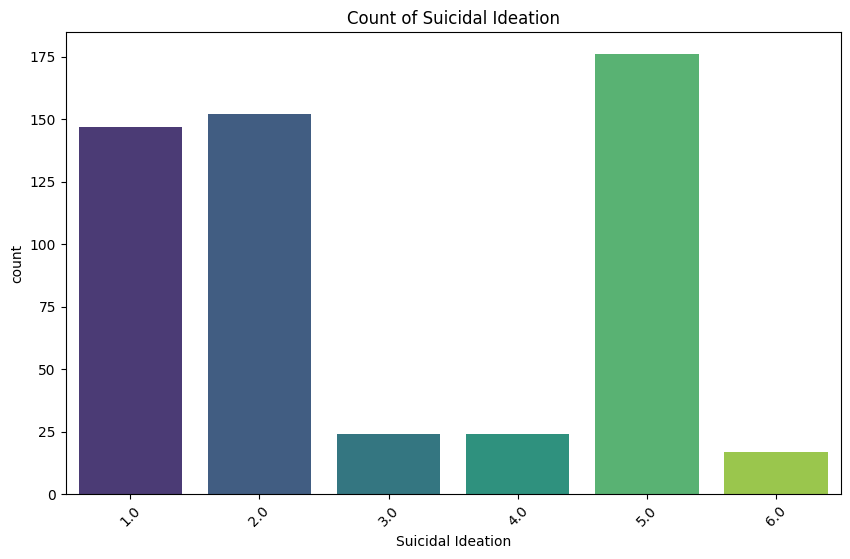

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Handle missing values (example: filling with the mode for categorical columns)
for column in non_numeric_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Identify the suicidal ideation column
suicidal_ideation_col = 'Suicidal Ideation'  # Change this to the actual column name if different

# Plotting the count of suicidal ideation occurrences
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=suicidal_ideation_col, palette='viridis')
plt.title(f'Count of {suicidal_ideation_col}')
plt.xticks(rotation=45)
plt.show()

# Plotting relationships with other categorical columns
for column in non_numeric_columns:
    if column != suicidal_ideation_col:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=suicidal_ideation_col, hue=column, palette='viridis')
        plt.title(f'Relationship between {suicidal_ideation_col} and {column}')
        plt.xticks(rotation=45)
        plt.show()


   Number   Sleep  Appetite  Interest  Fatigue  Worthlessness  Concentration  \
0        1    1.0       1.0       1.0      5.0            5.0            1.0   
1        2    2.0       5.0       5.0      1.0            1.0            5.0   
2        3    5.0       2.0       2.0      2.0            2.0            2.0   
3        4    1.0       1.0       1.0      5.0            5.0            1.0   
4        5    2.0       5.0       5.0      1.0            1.0            5.0   

   Agitation  Suicidal Ideation  Sleep Disturbance  Aggression  Panic Attacks  \
0        5.0                5.0                1.0         5.0            5.0   
1        1.0                1.0                5.0         1.0            1.0   
2        2.0                2.0                2.0         2.0            2.0   
3        5.0                5.0                1.0         5.0            5.0   
4        1.0                1.0                5.0         1.0            1.0   

   Hopelessness  Restlessness  L

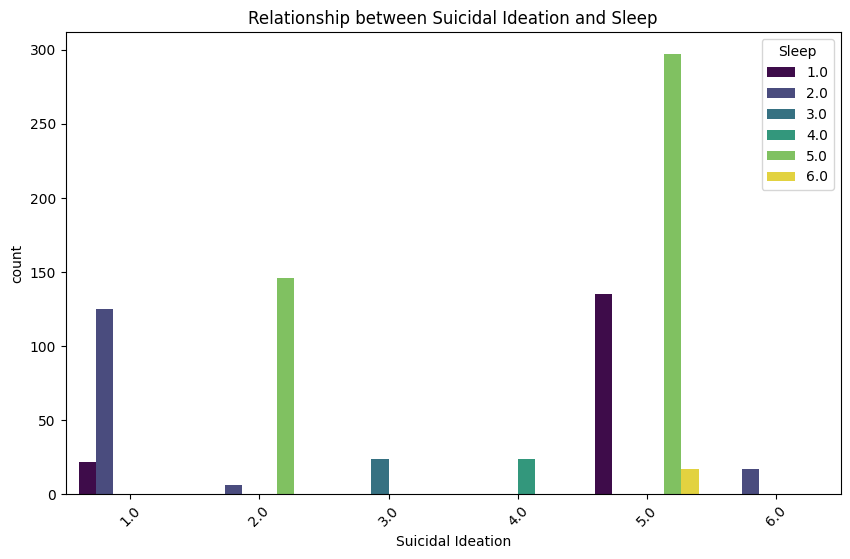

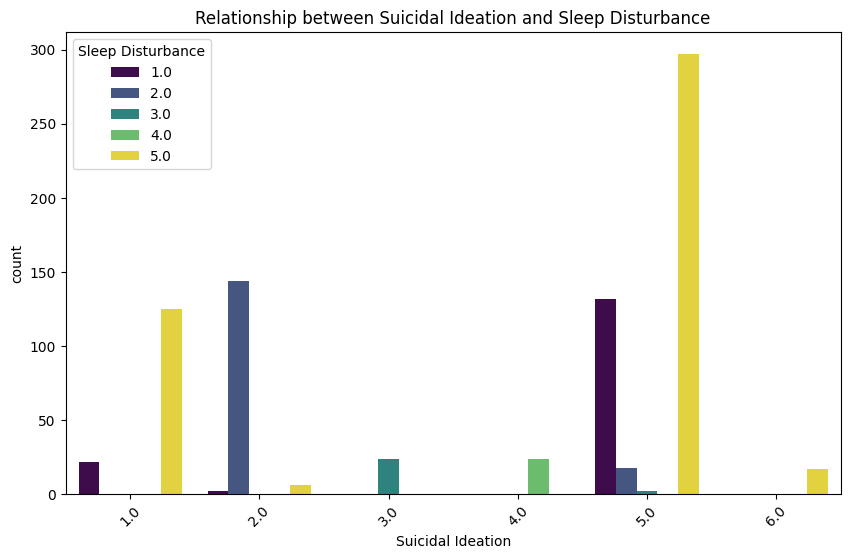

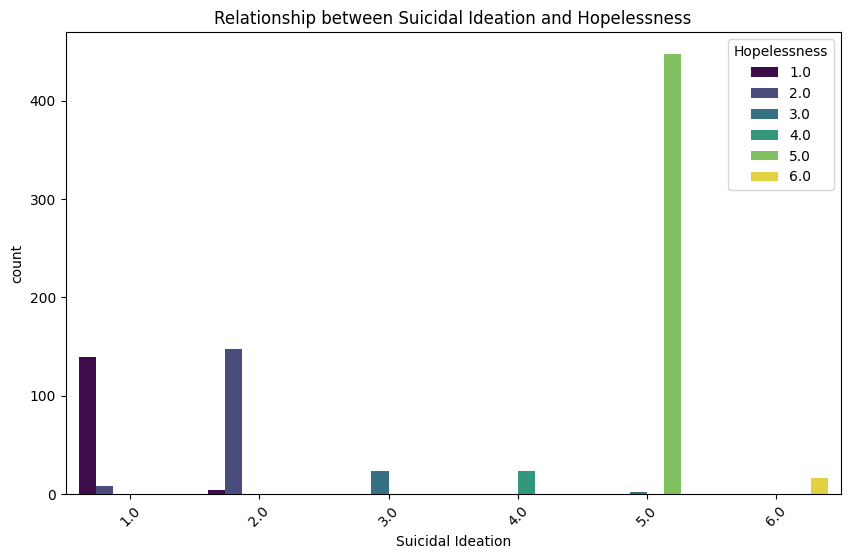

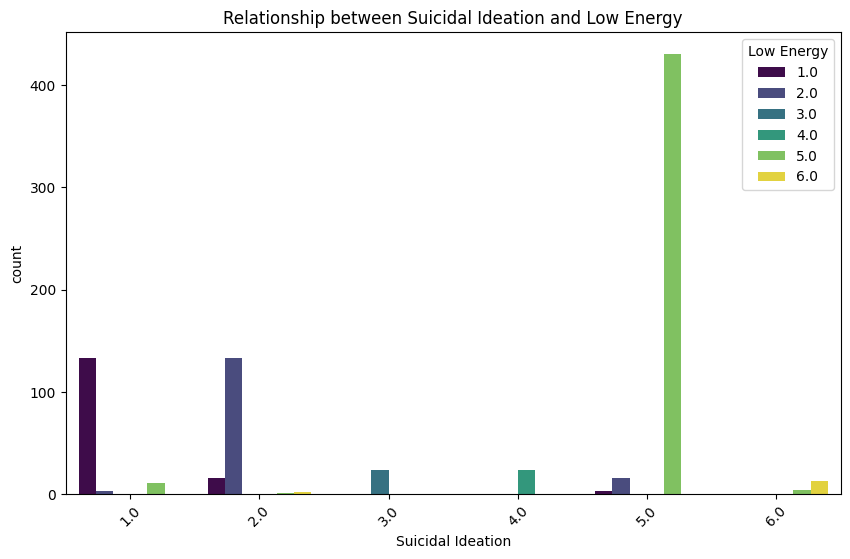

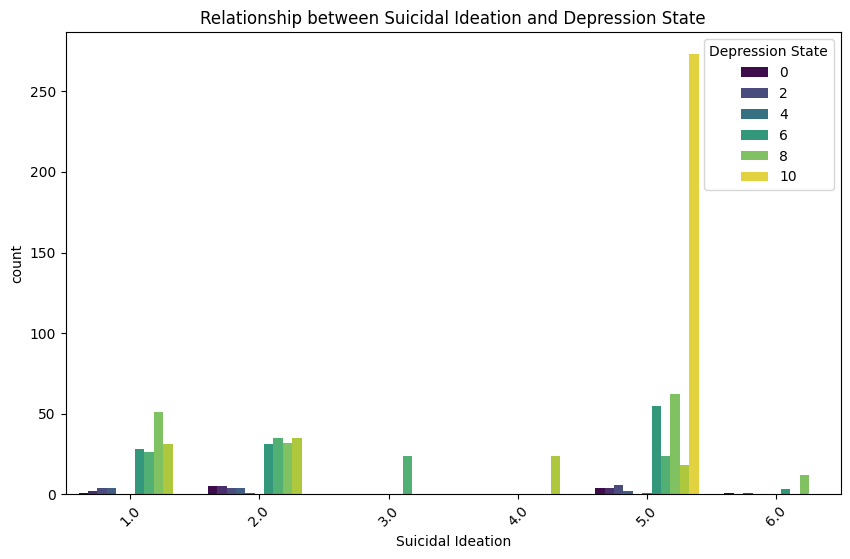

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Handle missing values (example: filling with the mode for categorical columns)
columns_of_interest = ['Suicidal Ideation', 'Sleep', 'Sleep Disturbance', 'Hopelessness', 'Low Energy', 'Depression State']
for column in columns_of_interest:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Plotting relationships with specific columns
for column in columns_of_interest:
    if column != 'Suicidal Ideation':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='Suicidal Ideation', hue=column, palette='viridis')
        plt.title(f'Relationship between Suicidal Ideation and {column}')
        plt.xticks(rotation=45)
        plt.show()
